In [11]:
%load_ext autoreload

In [12]:
%autoreload 2

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



from gradient_boosting_trees.model import GBRegressionTrees, GBParams
from gradient_boosting_trees.regression.tree import RegressionTree
from gradient_boosting_trees.regression.cart.builder import TreeLevelNodeBuilder

# Setting up 2-D data (with one feature)

In [2]:
X = np.arange(5, step=0.001)
Y = np.cos(X**2)
X = X.reshape(len(X), 1)

In [3]:
X.shape

(5000, 1)

In [4]:
data = pd.DataFrame(list(zip(X.ravel(), Y)), columns=["X", "Y"])

# Fitting an approximation to the cosine function

In [5]:
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
tree = RegressionTree(node_builder=builder)

In [6]:

builder_2 = TreeLevelNodeBuilder(min_moints=150, max_level=50)
tree_2 = RegressionTree(node_builder=builder_2)

In [7]:
tree.fit(points=X, labels=Y)

In [8]:
tree_2.fit(points=X, labels=Y)

In [9]:
predictions = tree.predict(X)

In [10]:

predictions2 = tree_2.predict(X)

In [11]:
data["predictions"] = predictions
data["predictions2"] = predictions2

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packag

<Axes: xlabel='X'>

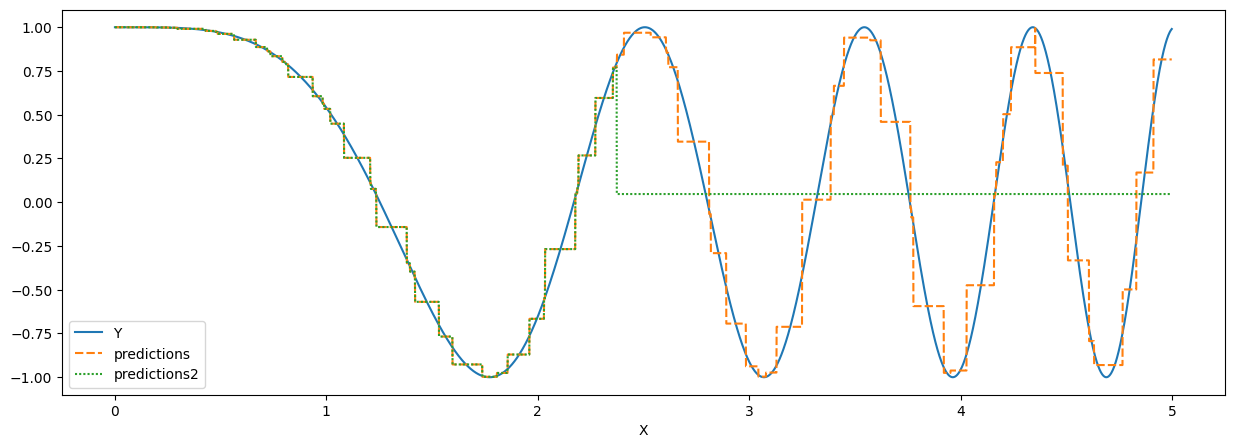

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data.set_index("X"))

# Setting up 3D data (with 2 features)

In [132]:
X = np.arange(20, step=0.01)
Y = np.arange(10, 30, step=0.01)
Z = np.cos(X*Y)
# X = X.reshape(len(X), 1)

In [133]:
builder = TreeLevelNodeBuilder(min_moints=30, max_level=300)
tree = RegressionTree(node_builder=builder)

In [134]:
points = np.hstack([X.reshape(len(X), 1), Y.reshape(len(Y), 1)])

In [135]:
tree.fit(points=points, labels=Z)

In [136]:
predictions = tree.predict(points=points)

In [137]:
data = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), Z, ["Z" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [138]:
data_pred = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), predictions, ["Predictions" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [139]:
plot_data = pd.concat([data, data_pred])

In [140]:
px.line_3d(data_frame=plot_data, x="X", y="Y", z="Z", width=1000, height=1000, color="Type")

## Gradient Boosting

In [44]:
params = GBParams(shrinkage=0.001)
builder = TreeLevelNodeBuilder(min_moints=150, max_level=50)
gradient_boosting  = GBRegressionTrees(params=params, node_builder=builder)

In [40]:
X = np.arange(20, step=0.01)
Y = np.cos(X)
X = X.reshape(len(X), 1)

In [53]:
gradient_boosting.fit(points=X, labels=Y, n_iterations=200)

100%|██████████| 200/200 [01:46<00:00,  1.88it/s]


In [55]:
gb_predictions = gradient_boosting.predict(points=X)

In [54]:
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
tree = RegressionTree(node_builder=builder)

In [35]:
tree.fit(points=X, labels=Y)

In [36]:
tree_preds = tree.predict(X)

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

<Axes: >

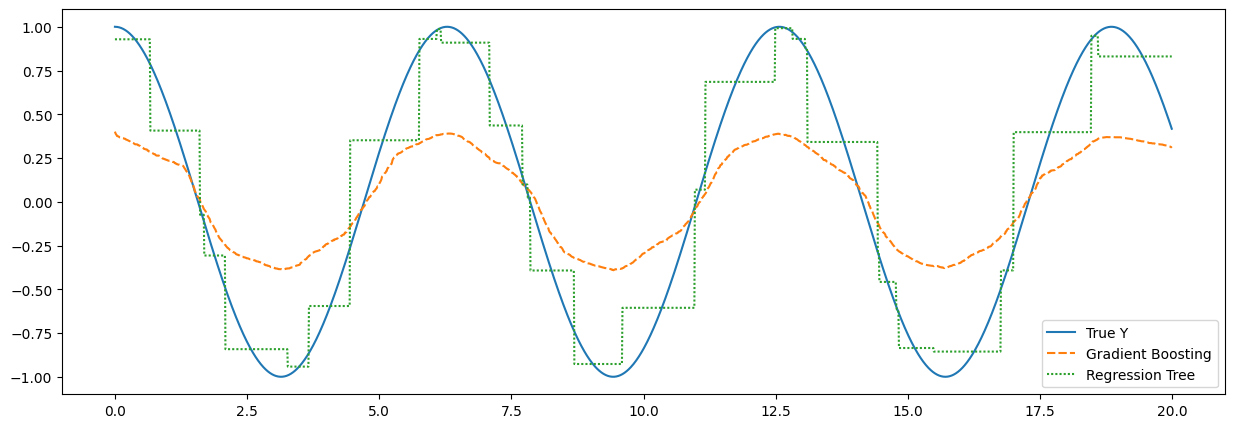

In [56]:
plt.figure(figsize=(15, 5))

data = pd.DataFrame(index=X.ravel(), data=list(zip(Y, gb_predictions, tree_preds)), columns=["True Y", "Gradient Boosting", "Regression Tree"])
sns.lineplot(data=data)

In [57]:
px.line(gradient_boosting.learning_error, title="Training loss")